In [72]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
uploaded = files.upload()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
df= pd.read_csv('total4.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,wins_x,losses_x,draws_x,height_cm_x,weight_in_kg_x,reach_in_cm_x,stance_x,date_of_birth_x,significant_strikes_landed_per_minute_x,...,average_submissions_attempted_per_15_minutes_x,association,Win-Loss-Draw,Win %,weight_class_2,idh_nasc,idh_mais_recente,Region,Code,country_y
0,Robert Drysdale,7,0,0,190.50,92.99,190.50,Orthodox,1981,0.00,...,21.9,NaN,7-0-0.,1.000000,Peso Meio-Pesado,0.889,0.927,North America,USA,United States
1,Paul Ruiz,7,4,0,167.64,61.23,167.64,NaN,1986,1.40,...,20.9,NaN,7-4-0.,0.636364,Peso Galo,0.889,0.927,North America,USA,United States
2,Gerald Strebendt,9,7,0,175.26,70.31,175.26,Orthodox,1979,0.00,...,16.4,NaN,9-7-0.,0.562500,Peso Leve,0.889,0.927,North America,USA,United States
3,Neil Grove,12,8,1,198.12,120.2,198.12,Orthodox,1971,0.00,...,14.3,NaN,12-8-1.,0.595238,Peso Pesado,NaN,NaN,NaN,NaN,England
4,Raphael Butler,9,2,1,190.50,118.39,190.50,NaN,1986,4.69,...,14.1,NaN,9-2-1.,0.791667,Peso Pesado,0.889,0.927,North America,USA,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,Abner Lloveras,20,9,1,180.34,70.31,180.34,NaN,1986,6.27,...,0.0,NaN,20-9-1.,0.683333,Peso Leve,0.811,0.911,Europe,ESP,Spain
2491,Brian Melancon,7,3,0,172.72,77.11,172.72,Orthodox,1982,4.18,...,0.0,NaN,7-3-0.,0.700000,Peso Meio-Médio,0.889,0.927,North America,USA,United States
2492,Amaury Bitetti,5,2,0,175.26,83.91,175.26,Orthodox,1986,0.00,...,0.0,NaN,5-2-0.,0.714286,Peso Médio,0.656,0.760,South America,BRA,Brazil
2493,John Campetella,0,1,0,175.26,106.59,175.26,Orthodox,1986,0.00,...,0.0,NaN,0-1-0.,0.000000,Peso Pesado,0.889,0.927,North America,USA,United States


In [75]:
#df = df.dropna(subset=['idh_mais_recente'])
df = df.drop(["name", "stance_x", "association", "Code"], axis = 1)
df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,wins_x,losses_x,draws_x,height_cm_x,weight_in_kg_x,reach_in_cm_x,date_of_birth_x,significant_strikes_landed_per_minute_x,significant_striking_accuracy_x,significant_strikes_absorbed_per_minute_x,...,takedown_accuracy_x,takedown_defense_x,average_submissions_attempted_per_15_minutes_x,Win-Loss-Draw,Win %,weight_class_2,idh_nasc,idh_mais_recente,Region,country_y
0,7,0,0,190.50,92.99,190.50,1981,0.00,0.0,0.00,...,100.0,0.0,21.9,7-0-0.,1.000000,Peso Meio-Pesado,0.889,0.927,North America,United States
1,7,4,0,167.64,61.23,167.64,1986,1.40,33.0,1.40,...,0.0,100.0,20.9,7-4-0.,0.636364,Peso Galo,0.889,0.927,North America,United States
2,9,7,0,175.26,70.31,175.26,1979,0.00,0.0,4.00,...,0.0,0.0,16.4,9-7-0.,0.562500,Peso Leve,0.889,0.927,North America,United States
3,12,8,1,198.12,120.2,198.12,1971,0.00,0.0,0.00,...,0.0,100.0,14.3,12-8-1.,0.595238,Peso Pesado,NaN,NaN,NaN,England
4,9,2,1,190.50,118.39,190.50,1986,4.69,45.0,0.94,...,0.0,100.0,14.1,9-2-1.,0.791667,Peso Pesado,0.889,0.927,North America,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,20,9,1,180.34,70.31,180.34,1986,6.27,49.0,6.87,...,20.0,0.0,0.0,20-9-1.,0.683333,Peso Leve,0.811,0.911,Europe,Spain
2491,7,3,0,172.72,77.11,172.72,1982,4.18,49.0,3.64,...,100.0,66.0,0.0,7-3-0.,0.700000,Peso Meio-Médio,0.889,0.927,North America,United States
2492,5,2,0,175.26,83.91,175.26,1986,0.00,0.0,0.00,...,0.0,0.0,0.0,5-2-0.,0.714286,Peso Médio,0.656,0.760,South America,Brazil
2493,0,1,0,175.26,106.59,175.26,1986,0.00,0.0,0.00,...,0.0,0.0,0.0,0-1-0.,0.000000,Peso Pesado,0.889,0.927,North America,United States


In [76]:
grouped_df = df.groupby(['country_y', 'weight_class_2']).size().reset_index(name='count')
grouped_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country_y,weight_class_2,count
0,Afghanistan,Peso Leve,1
1,Afghanistan,Peso Meio-Médio,1
2,Angola,Peso Leve,1
3,Angola,Peso Mosca,1
4,Argentina,Peso Galo,1
...,...,...,...
253,Venezuela,Peso Leve,2
254,Venezuela,Peso Palha,1
255,Wales,Peso Galo,2
256,Wales,Peso Leve,1


In [77]:
#discretização variáveis numéricas

numeric_columns = ['wins_x', 'losses_x', 'draws_x', 'height_cm_x', 'weight_in_kg_x', 'reach_in_cm_x',
                   'date_of_birth_x', 'significant_strikes_landed_per_minute_x', 'significant_striking_accuracy_x',
                   'significant_strikes_absorbed_per_minute_x', 'significant_strike_defence_x',
                   'average_takedowns_landed_per_15_minutes_x', 'takedown_accuracy_x',
                   'takedown_defense_x', 'average_submissions_attempted_per_15_minutes_x', 'Win %', 'idh_nasc', 'idh_mais_recente']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['idh_nasc_disc'] = pd.cut(df['idh_nasc'], bins=[0, 0.7, 0.85, 1], labels=['idh_baixo', 'idh_médio', 'idh_alto'])
df['idh_mais_recente_disc'] = pd.cut(df['idh_mais_recente'], bins=[0, 0.7, 0.85, 1], labels=['idh_mais_recente_baixo', 'idh_mais_recente_médio', 'idh_mais_recente_alto'])
df['avg_sub_disc'] = pd.cut(df['average_submissions_attempted_per_15_minutes_x'],
                            bins=[0, 5, 10, 20], labels=['avg_sub_baixo', 'avg_sub_médio', 'avg_sub_alto'])
df['wins_disc'] = pd.cut(df['wins_x'], bins=[0, 5, 10, 20, 50], labels=['wins_baixo', 'wins_médio', 'wins_alto', 'wins_muito alto'])
df['losses_disc'] = pd.cut(df['losses_x'], bins=[0, 3, 6, 10, 20], labels=['losses_baixo', 'losses_médio', 'losses_alto', 'losses_muito alto'])
df['draws_disc'] = pd.cut(df['draws_x'], bins=[0, 1, 3, 5], labels=['draws_baixo', 'draws_médio', 'draws_alto'])

df['height_disc'] = pd.cut(df['height_cm_x'], bins=[0, 160, 175, 190, 210], labels=['height_baixo', 'height_médio', 'height_alto', 'height_muito alto'])
df['weight_disc'] = pd.cut(df['weight_in_kg_x'], bins=[0, 60, 75, 90, 120, 150], labels=['weight_baixo', 'weight_médio', 'weight_alto', 'weight_muito alto', 'weight_extremo'])
df['reach_disc'] = pd.cut(df['reach_in_cm_x'], bins=[0, 160, 175, 190, 210], labels=['reach_baixo', 'reach_médio', 'reach_alto', 'reach_muito alto'])

df['dob_disc'] = pd.cut(df['date_of_birth_x'], bins=[1960, 1975, 1990, 2005], labels=['dob_veterano', 'dob_meia-idade', 'dob_jovem'])

df['strikes_landed_disc'] = pd.cut(df['significant_strikes_landed_per_minute_x'], bins=[0, 1, 3, 5, 10], labels=['strikes_landed_baixo', 'strikes_landed_médio', 'strikes_landed_alto', 'strikes_landed_muito alto'])
df['striking_accuracy_disc'] = pd.cut(df['significant_striking_accuracy_x'], bins=[0, 30, 50, 70, 100], labels=['striking_acc_baixo', 'striking_acc_médio', 'striking_acc_alto', 'striking_acc_muito alto'])
df['strikes_absorbed_disc'] = pd.cut(df['significant_strikes_absorbed_per_minute_x'], bins=[0, 1, 3, 5, 10], labels=['strikes_absorbed_baixo', 'strikes_absorbed_médio', 'strikes_absorbed_alto', 'strikes_absorbed_muito alto'])
df['strike_defence_disc'] = pd.cut(df['significant_strike_defence_x'], bins=[0, 50, 60, 80, 100], labels=['strike_defence_baixo', 'strike_defence_médio', 'strike_defence_alto', 'strike_defence_muito alto'])

df['takedowns_landed_disc'] = pd.cut(df['average_takedowns_landed_per_15_minutes_x'], bins=[0, 1, 3, 5, 10], labels=['takedowns_landed_baixo', 'takedowns_landed_médio', 'takedowns_landed_alto', 'takedowns_landed_muito alto'])
df['takedown_accuracy_disc'] = pd.cut(df['takedown_accuracy_x'], bins=[0, 30, 50, 70, 100], labels=['takedown_accuracy_baixo', 'takedown_accuracy_médio', 'takedown_accuracy_alto', 'takedown_accuracy_muito alto'])
df['takedown_defense_disc'] = pd.cut(df['takedown_defense_x'], bins=[0, 30, 50, 70, 100], labels=['takedown_defense_baixo', 'takedown_defense_médio', 'takedown_defense_alto', 'takedown_defense_muito alto'])

df['win_loss_draw_disc'] = pd.cut(df['Win-Loss-Draw'].str.extract(r'(\d+)')[0].astype(float), bins=[0, 5, 10, 20], labels=['win_loss_baixo', 'win_loss_médio', 'win_loss_alto'])
df['win_percent_disc'] = pd.cut(df['Win %'], bins=[0, 0.5, 0.75, 0.9, 1], labels=['win_percent_baixo', 'win_percent_médio', 'win_percent_alto', 'win_percent_muito alto'])


df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   wins_x                                          2495 non-null   int64   
 1   losses_x                                        2495 non-null   int64   
 2   draws_x                                         2495 non-null   int64   
 3   height_cm_x                                     2495 non-null   float64 
 4   weight_in_kg_x                                  2482 non-null   float64 
 5   reach_in_cm_x                                   2495 non-null   float64 
 6   date_of_birth_x                                 2495 non-null   int64   
 7   significant_strikes_landed_per_minute_x         2495 non-null   float64 
 8   significant_striking_accuracy_x                 2495 non-null   float64 
 9   significant_strikes_absorbed_p

In [78]:
df.info()
df_disc = df[['weight_class_2','wins_disc', 'losses_disc', 'draws_disc', 'reach_disc',
                         'strikes_landed_disc', 'striking_accuracy_disc', 'strikes_absorbed_disc',
                         'strike_defence_disc', 'takedowns_landed_disc', 'takedown_accuracy_disc', 'takedown_defense_disc',
                        'avg_sub_disc', 'idh_nasc_disc']]

#df_disc = df_disc.sample(n=100)
df_disc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   wins_x                                          2495 non-null   int64   
 1   losses_x                                        2495 non-null   int64   
 2   draws_x                                         2495 non-null   int64   
 3   height_cm_x                                     2495 non-null   float64 
 4   weight_in_kg_x                                  2482 non-null   float64 
 5   reach_in_cm_x                                   2495 non-null   float64 
 6   date_of_birth_x                                 2495 non-null   int64   
 7   significant_strikes_landed_per_minute_x         2495 non-null   float64 
 8   significant_striking_accuracy_x                 2495 non-null   float64 
 9   significant_strikes_absorbed_p

,weight_class_2,wins_disc,losses_disc,draws_disc,reach_disc,strikes_landed_disc,striking_accuracy_disc,strikes_absorbed_disc,strike_defence_disc,takedowns_landed_disc,takedown_accuracy_disc,takedown_defense_disc,avg_sub_disc,idh_nasc_disc
0,Peso Meio-Pesado,wins_médio,NaN,NaN,reach_muito alto,NaN,NaN,NaN,NaN,takedowns_landed_muito alto,takedown_accuracy_muito alto,NaN,NaN,idh_alto
1,Peso Galo,wins_médio,losses_médio,NaN,reach_médio,strikes_landed_médio,striking_acc_médio,strikes_absorbed_médio,strike_defence_alto,NaN,NaN,takedown_defense_muito alto,NaN,idh_alto
2,Peso Leve,wins_médio,losses_alto,NaN,reach_alto,NaN,NaN,strikes_absorbed_alto,strike_defence_baixo,NaN,NaN,NaN,avg_sub_alto,idh_alto
3,Peso Pesado,wins_alto,losses_alto,draws_baixo,reach_muito alto,NaN,NaN,NaN,NaN,NaN,NaN,takedown_defense_muito alto,avg_sub_alto,NaN
4,Peso Pesado,wins_médio,losses_baixo,draws_baixo,reach_muito alto,strikes_landed_alto,striking_acc_médio,strikes_absorbed_baixo,strike_defence_muito alto,NaN,NaN,takedown_defense_muito alto,avg_sub_alto,idh_alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,Peso Leve,wins_alto,losses_alto,draws_baixo,reach_alto,strikes_landed_muito alto,striking_acc_médio,strikes_absorbed_muito alto,strike_defence_baixo,takedowns_landed_médio,takedown_accuracy_baixo,NaN,NaN,idh_médio
2491,Peso Meio-Médio,wins_médio,losses_baixo,NaN,reach_médio,strikes_landed_alto,striking_acc_médio,strikes_absorbed_alto,strike_defence_alto,takedowns_landed_médio,takedown_accuracy_muito alto,takedown_defense_alto,NaN,idh_alto
2492,Peso Médio,wins_baixo,losses_baixo,NaN,reach_alto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,idh_baixo
2493,Peso Pesado,NaN,losses_baixo,NaN,reach_alto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,idh_alto


In [79]:
df_disc = df_disc.dropna()
df_disc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,weight_class_2,wins_disc,losses_disc,draws_disc,reach_disc,strikes_landed_disc,striking_accuracy_disc,strikes_absorbed_disc,strike_defence_disc,takedowns_landed_disc,takedown_accuracy_disc,takedown_defense_disc,avg_sub_disc,idh_nasc_disc
22,Peso Leve,wins_muito alto,losses_médio,draws_baixo,reach_médio,strikes_landed_médio,striking_acc_médio,strikes_absorbed_médio,strike_defence_baixo,takedowns_landed_baixo,takedown_accuracy_médio,takedown_defense_baixo,avg_sub_médio,idh_alto
39,Peso Médio,wins_alto,losses_médio,draws_baixo,reach_alto,strikes_landed_médio,striking_acc_muito alto,strikes_absorbed_baixo,strike_defence_alto,takedowns_landed_alto,takedown_accuracy_muito alto,takedown_defense_muito alto,avg_sub_baixo,idh_alto
48,Peso Leve,wins_alto,losses_médio,draws_médio,reach_alto,strikes_landed_médio,striking_acc_médio,strikes_absorbed_médio,strike_defence_baixo,takedowns_landed_alto,takedown_accuracy_alto,takedown_defense_médio,avg_sub_baixo,idh_alto
65,Peso Meio-Pesado,wins_alto,losses_muito alto,draws_baixo,reach_alto,strikes_landed_médio,striking_acc_médio,strikes_absorbed_alto,strike_defence_médio,takedowns_landed_médio,takedown_accuracy_baixo,takedown_defense_médio,avg_sub_baixo,idh_alto
66,Peso Leve,wins_alto,losses_médio,draws_baixo,reach_alto,strikes_landed_médio,striking_acc_alto,strikes_absorbed_médio,strike_defence_alto,takedowns_landed_médio,takedown_accuracy_baixo,takedown_defense_médio,avg_sub_baixo,idh_alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,Peso Leve,wins_muito alto,losses_alto,draws_baixo,reach_alto,strikes_landed_médio,striking_acc_médio,strikes_absorbed_médio,strike_defence_médio,takedowns_landed_médio,takedown_accuracy_médio,takedown_defense_muito alto,avg_sub_baixo,idh_médio
1338,Peso Galo,wins_alto,losses_médio,draws_médio,reach_médio,strikes_landed_muito alto,striking_acc_alto,strikes_absorbed_médio,strike_defence_alto,takedowns_landed_baixo,takedown_accuracy_médio,takedown_defense_muito alto,avg_sub_baixo,idh_alto
1341,Peso Meio-Médio,wins_muito alto,losses_médio,draws_baixo,reach_alto,strikes_landed_alto,striking_acc_médio,strikes_absorbed_alto,strike_defence_médio,takedowns_landed_médio,takedown_accuracy_baixo,takedown_defense_alto,avg_sub_baixo,idh_alto
1352,Peso Médio,wins_muito alto,losses_muito alto,draws_baixo,reach_muito alto,strikes_landed_alto,striking_acc_médio,strikes_absorbed_alto,strike_defence_médio,takedowns_landed_baixo,takedown_accuracy_baixo,takedown_defense_muito alto,avg_sub_baixo,idh_alto


In [80]:
df_peso_palha = df_disc[df_disc['weight_class_2'] == 'Peso Palha']
df_peso_mosca = df_disc[df_disc['weight_class_2'] == 'Peso Mosca']
df_peso_galo = df_disc[df_disc['weight_class_2'] == 'Peso Galo']
df_peso_pena = df_disc[df_disc['weight_class_2'] == 'Peso Pena']
df_peso_leve = df_disc[df_disc['weight_class_2'] == 'Peso Leve']
df_peso_meio_medio = df_disc[df_disc['weight_class_2'] == 'Peso Meio-Médio']
df_peso_medio = df_disc[df_disc['weight_class_2'] == 'Peso Médio']
df_peso_meio_pesado = df_disc[df_disc['weight_class_2'] == 'Peso Meio-Pesado']
df_peso_pesado = df_disc[df_disc['weight_class_2'] == 'Peso Pesado']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
''' #peso palha
df_peso_palha = df_peso_palha.drop(columns="weight_class_2")
df_lista_palha = df_peso_palha.astype(str).values.tolist()
te1 = TransactionEncoder()
te_ary = te1.fit(df_lista_palha).transform(df_lista_palha)
df_transformado = pd.DataFrame(te_ary, columns = te1.columns_)
frequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
regras = regras.sort_values(['confidence', 'lift'], ascending =[False, False])
regras.to_csv("dataframe_regras_palha.csv", index = False)
plt.scatter(regras['confidence'], regras['support'], c=regras['lift'])
plt.show()
regras '''
df_peso_palha

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,weight_class_2,wins_disc,losses_disc,draws_disc,reach_disc,strikes_landed_disc,striking_accuracy_disc,strikes_absorbed_disc,strike_defence_disc,takedowns_landed_disc,takedown_accuracy_disc,takedown_defense_disc,avg_sub_disc,idh_nasc_disc


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


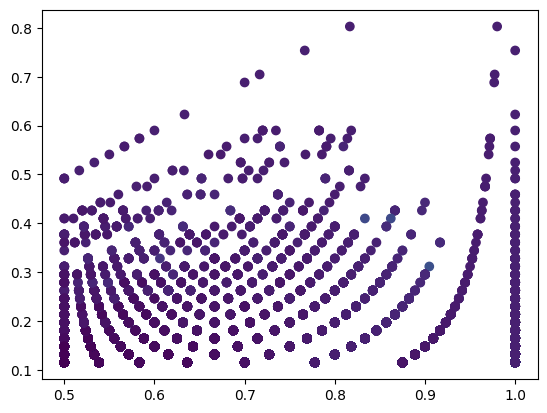

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,"(reach_alto, idh_alto)",(avg_sub_baixo),0.524590,0.983607,0.524590,1.000000,1.016667,0.008600,inf,0.034483
146,"(reach_alto, draws_baixo)",(avg_sub_baixo),0.557377,0.983607,0.557377,1.000000,1.016667,0.009137,inf,0.037037
8268,(reach_alto),(avg_sub_baixo),0.754098,0.983607,0.754098,1.000000,1.016667,0.012362,inf,0.066667
8273,"(reach_alto, striking_acc_médio)",(avg_sub_baixo),0.590164,0.983607,0.590164,1.000000,1.016667,0.009675,inf,0.040000
12114,(takedowns_landed_médio),(avg_sub_baixo),0.622951,0.983607,0.622951,1.000000,1.016667,0.010212,inf,0.043478
12378,"(takedowns_landed_médio, striking_acc_médio)",(avg_sub_baixo),0.508197,0.983607,0.508197,1.000000,1.016667,0.008331,inf,0.033333
1,(striking_acc_médio),(avg_sub_baixo),0.819672,0.983607,0.803279,0.980000,0.996333,-0.002956,0.819672,-0.020000
5,(idh_alto),(avg_sub_baixo),0.721311,0.983607,0.704918,0.977273,0.993561,-0.004569,0.721311,-0.022727
44,(draws_baixo),(avg_sub_baixo),0.704918,0.983607,0.688525,0.976744,0.993023,-0.004837,0.704918,-0.023256
10,"(striking_acc_médio, idh_alto)",(avg_sub_baixo),0.590164,0.983607,0.573770,0.972222,0.988426,-0.006719,0.590164,-0.027778


In [82]:
#peso leve
df_peso_leve = df_peso_leve.drop(columns="weight_class_2")
df_lista_leve = df_peso_leve.astype(str).values.tolist()
te1 = TransactionEncoder()
te_ary = te1.fit(df_lista_leve).transform(df_lista_leve)
df_transformado = pd.DataFrame(te_ary, columns = te1.columns_)
frequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
regras = regras.sort_values(['confidence', 'lift'], ascending =[False, False])
plt.scatter(regras['confidence'], regras['support'], c=regras['lift'])
plt.show()
regras
rules_above = regras[(regras["confidence"] > 0.80) & (regras["support"] > 0.5)]
rules_above.to_csv("dataframe_regras_pena.csv", index = False)

rules_above


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


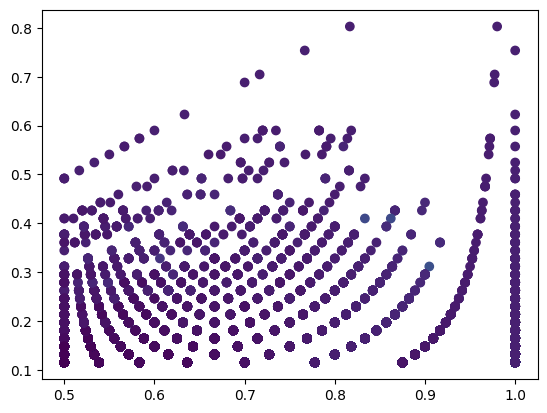

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,"(reach_alto, idh_alto)",(avg_sub_baixo),0.524590,0.983607,0.524590,1.000000,1.016667,0.008600,inf,0.034483
146,"(reach_alto, draws_baixo)",(avg_sub_baixo),0.557377,0.983607,0.557377,1.000000,1.016667,0.009137,inf,0.037037
8268,(reach_alto),(avg_sub_baixo),0.754098,0.983607,0.754098,1.000000,1.016667,0.012362,inf,0.066667
8273,"(reach_alto, striking_acc_médio)",(avg_sub_baixo),0.590164,0.983607,0.590164,1.000000,1.016667,0.009675,inf,0.040000
12114,(takedowns_landed_médio),(avg_sub_baixo),0.622951,0.983607,0.622951,1.000000,1.016667,0.010212,inf,0.043478
12378,"(takedowns_landed_médio, striking_acc_médio)",(avg_sub_baixo),0.508197,0.983607,0.508197,1.000000,1.016667,0.008331,inf,0.033333
1,(striking_acc_médio),(avg_sub_baixo),0.819672,0.983607,0.803279,0.980000,0.996333,-0.002956,0.819672,-0.020000
5,(idh_alto),(avg_sub_baixo),0.721311,0.983607,0.704918,0.977273,0.993561,-0.004569,0.721311,-0.022727
44,(draws_baixo),(avg_sub_baixo),0.704918,0.983607,0.688525,0.976744,0.993023,-0.004837,0.704918,-0.023256
10,"(striking_acc_médio, idh_alto)",(avg_sub_baixo),0.590164,0.983607,0.573770,0.972222,0.988426,-0.006719,0.590164,-0.027778


In [83]:
#peso mosca
df_peso_mosca = df_peso_mosca.drop(columns="weight_class_2")
df_lista_mosca = df_peso_leve.astype(str).values.tolist()
te2 = TransactionEncoder()
te_ary = te2.fit(df_lista_mosca).transform(df_lista_mosca)
df_transformado = pd.DataFrame(te_ary, columns = te2.columns_)
frequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
regras = regras.sort_values(['confidence', 'lift'], ascending =[False, False])
plt.scatter(regras['confidence'], regras['support'], c=regras['lift'])
plt.show()
regras
rules_above = regras[(regras["confidence"] > 0.80) & (regras["support"] > 0.5)]
rules_above.to_csv("dataframe_regras_mosca.csv", index = False)

rules_above

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


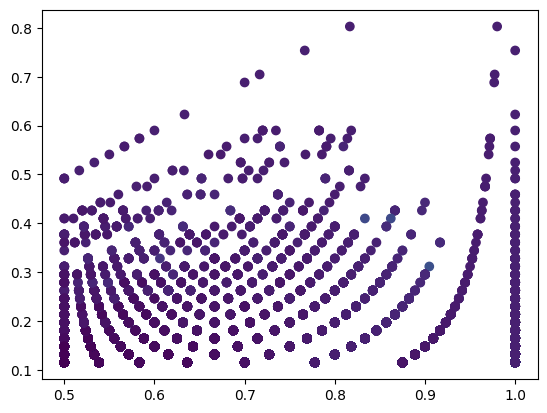

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,"(reach_alto, idh_alto)",(avg_sub_baixo),0.524590,0.983607,0.524590,1.000000,1.016667,0.008600,inf,0.034483
146,"(reach_alto, draws_baixo)",(avg_sub_baixo),0.557377,0.983607,0.557377,1.000000,1.016667,0.009137,inf,0.037037
8268,(reach_alto),(avg_sub_baixo),0.754098,0.983607,0.754098,1.000000,1.016667,0.012362,inf,0.066667
8273,"(reach_alto, striking_acc_médio)",(avg_sub_baixo),0.590164,0.983607,0.590164,1.000000,1.016667,0.009675,inf,0.040000
12114,(takedowns_landed_médio),(avg_sub_baixo),0.622951,0.983607,0.622951,1.000000,1.016667,0.010212,inf,0.043478
12378,"(takedowns_landed_médio, striking_acc_médio)",(avg_sub_baixo),0.508197,0.983607,0.508197,1.000000,1.016667,0.008331,inf,0.033333
1,(striking_acc_médio),(avg_sub_baixo),0.819672,0.983607,0.803279,0.980000,0.996333,-0.002956,0.819672,-0.020000
5,(idh_alto),(avg_sub_baixo),0.721311,0.983607,0.704918,0.977273,0.993561,-0.004569,0.721311,-0.022727
44,(draws_baixo),(avg_sub_baixo),0.704918,0.983607,0.688525,0.976744,0.993023,-0.004837,0.704918,-0.023256
10,"(striking_acc_médio, idh_alto)",(avg_sub_baixo),0.590164,0.983607,0.573770,0.972222,0.988426,-0.006719,0.590164,-0.027778


In [84]:
#peso galo
df_peso_galo = df_peso_galo.drop(columns="weight_class_2")
df_lista_galo = df_peso_leve.astype(str).values.tolist()
te3 = TransactionEncoder()
te_ary = te3.fit(df_lista_galo).transform(df_lista_galo)
df_transformado = pd.DataFrame(te_ary, columns = te3.columns_)
frequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
regras = regras.sort_values(['confidence', 'lift'], ascending =[False, False])
plt.scatter(regras['confidence'], regras['support'], c=regras['lift'])
plt.show()
regras
rules_above = regras[(regras["confidence"] > 0.80) & (regras["support"] > 0.5)]
rules_above.to_csv("dataframe_regras_galo.csv", index = False)

rules_above

In [85]:
''' #peso pena
df_peso_pena = df_peso_pena.drop(columns="weight_class_2")
df_lista_pena = df_peso_pena.astype(str).values.tolist()
te3 = TransactionEncoder()
te_ary = te3.fit(df_lista_pena).transform(df_lista_pena)
df_transformado = pd.DataFrame(te_ary, columns = te3.columns_)
frequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
regras = regras.sort_values(['confidence', 'lift'], ascending =[False, False])
regras.to_csv("dataframe_regras_pena.csv", index = False)
plt.scatter(regras['confidence'], regras['support'], c=regras['lift'])
plt.show()
regras '''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' #peso pena\ndf_peso_pena = df_peso_pena.drop(columns="weight_class_2")\ndf_lista_pena = df_peso_pena.astype(str).values.tolist()\nte3 = TransactionEncoder()\nte_ary = te3.fit(df_lista_pena).transform(df_lista_pena)\ndf_transformado = pd.DataFrame(te_ary, columns = te3.columns_)\nfrequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)\nregras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)\nregras = regras.sort_values([\'confidence\', \'lift\'], ascending =[False, False])\nregras.to_csv("dataframe_regras_pena.csv", index = False)\nplt.scatter(regras[\'confidence\'], regras[\'support\'], c=regras[\'lift\'])\nplt.show()\nregras '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


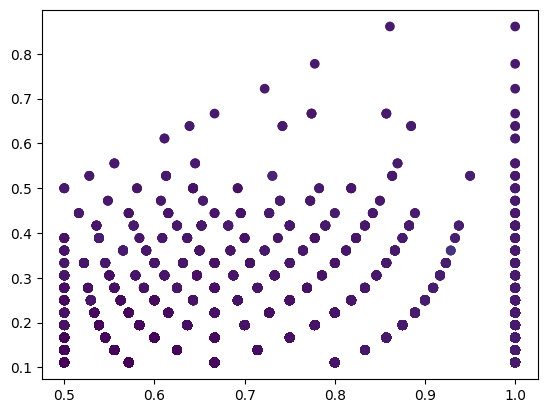

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(striking_acc_médio),(avg_sub_baixo),0.861111,1.000000,0.861111,1.000000,1.000000,0.000000,inf,0.000000
3,(draws_baixo),(avg_sub_baixo),0.777778,1.000000,0.777778,1.000000,1.000000,0.000000,inf,0.000000
8,"(draws_baixo, striking_acc_médio)",(avg_sub_baixo),0.666667,1.000000,0.666667,1.000000,1.000000,0.000000,inf,0.000000
13,(idh_alto),(avg_sub_baixo),0.722222,1.000000,0.722222,1.000000,1.000000,0.000000,inf,0.000000
20,"(striking_acc_médio, idh_alto)",(avg_sub_baixo),0.638889,1.000000,0.638889,1.000000,1.000000,0.000000,inf,0.000000
50,(strikes_landed_médio),(avg_sub_baixo),0.638889,1.000000,0.638889,1.000000,1.000000,0.000000,inf,0.000000
59,"(strikes_landed_médio, striking_acc_médio)",(avg_sub_baixo),0.555556,1.000000,0.555556,1.000000,1.000000,0.000000,inf,0.000000
145,(takedowns_landed_médio),(avg_sub_baixo),0.611111,1.000000,0.611111,1.000000,1.000000,0.000000,inf,0.000000
371,(reach_alto),(avg_sub_baixo),0.611111,1.000000,0.611111,1.000000,1.000000,0.000000,inf,0.000000
384,"(reach_alto, idh_alto)",(avg_sub_baixo),0.527778,1.000000,0.527778,1.000000,1.000000,0.000000,inf,0.000000


In [86]:
#peso meio medio
df_peso_meio_medio = df_peso_meio_medio.drop(columns="weight_class_2")
df_lista_meio_medio = df_peso_meio_medio.astype(str).values.tolist()
te3 = TransactionEncoder()
te_ary = te3.fit(df_lista_meio_medio).transform(df_lista_meio_medio)
df_transformado = pd.DataFrame(te_ary, columns = te3.columns_)
frequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
regras = regras.sort_values(['confidence', 'lift'], ascending =[False, False])
plt.scatter(regras['confidence'], regras['support'], c=regras['lift'])
plt.show()
regras
rules_above = regras[(regras["confidence"] > 0.80) & (regras["support"] > 0.5)]
rules_above.to_csv("dataframe_regras_meio_medio.csv", index = False)

rules_above

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


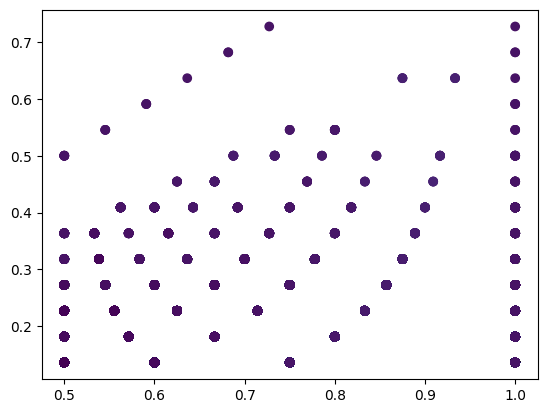

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(draws_baixo),(avg_sub_baixo),0.590909,1.000000,0.590909,1.000000,1.000000,0.000000,inf,0.000000
125,(idh_alto),(avg_sub_baixo),0.590909,1.000000,0.590909,1.000000,1.000000,0.000000,inf,0.000000
239,(strikes_landed_médio),(avg_sub_baixo),0.590909,1.000000,0.590909,1.000000,1.000000,0.000000,inf,0.000000
760,(reach_alto),(avg_sub_baixo),0.545455,1.000000,0.545455,1.000000,1.000000,0.000000,inf,0.000000
10962,(striking_acc_médio),(avg_sub_baixo),0.727273,1.000000,0.727273,1.000000,1.000000,0.000000,inf,0.000000
10964,(takedowns_landed_médio),(avg_sub_baixo),0.681818,1.000000,0.681818,1.000000,1.000000,0.000000,inf,0.000000
10969,"(takedowns_landed_médio, striking_acc_médio)",(avg_sub_baixo),0.636364,1.000000,0.636364,1.000000,1.000000,0.000000,inf,0.000000
19717,(strike_defence_médio),(avg_sub_baixo),0.681818,1.000000,0.681818,1.000000,1.000000,0.000000,inf,0.000000
19724,"(takedowns_landed_médio, strike_defence_médio)",(avg_sub_baixo),0.545455,1.000000,0.545455,1.000000,1.000000,0.000000,inf,0.000000
19730,"(strike_defence_médio, striking_acc_médio)",(avg_sub_baixo),0.545455,1.000000,0.545455,1.000000,1.000000,0.000000,inf,0.000000


In [87]:
#peso medio
df_peso_medio = df_peso_medio.drop(columns="weight_class_2")
df_lista_medio = df_peso_medio.astype(str).values.tolist()
te3 = TransactionEncoder()
te_ary = te3.fit(df_lista_medio).transform(df_lista_medio)
df_transformado = pd.DataFrame(te_ary, columns = te3.columns_)
frequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
regras = regras.sort_values(['confidence', 'lift'], ascending =[False, False])
plt.scatter(regras['confidence'], regras['support'], c=regras['lift'])
plt.show()
regras
rules_above = regras[(regras["confidence"] > 0.80) & (regras["support"] > 0.5)]
rules_above.to_csv("dataframe_regras_medio.csv", index = False)

rules_above

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


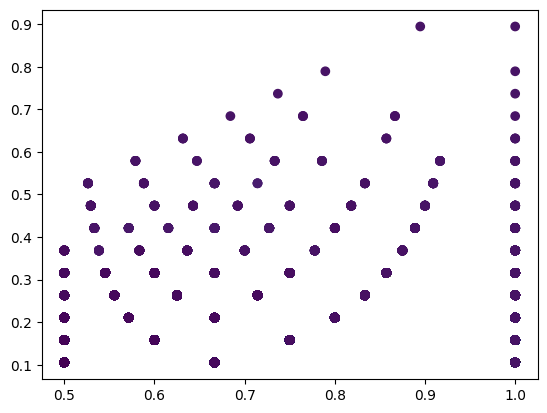

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
357386,(strikes_landed_alto),(draws_baixo),0.526316,0.894737,0.526316,1.000000,1.117647,0.055402,inf,0.222222
357397,"(avg_sub_baixo, strikes_landed_alto)",(draws_baixo),0.526316,0.894737,0.526316,1.000000,1.117647,0.055402,inf,0.222222
357401,(strikes_landed_alto),"(avg_sub_baixo, draws_baixo)",0.526316,0.894737,0.526316,1.000000,1.117647,0.055402,inf,0.222222
1,(draws_baixo),(avg_sub_baixo),0.894737,1.000000,0.894737,1.000000,1.000000,0.000000,inf,0.000000
3,(striking_acc_médio),(avg_sub_baixo),0.789474,1.000000,0.789474,1.000000,1.000000,0.000000,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...
189,"(avg_sub_baixo, strike_defence_médio)",(striking_acc_médio),0.631579,0.789474,0.526316,0.833333,1.055556,0.027701,1.263158,0.142857
193,(strike_defence_médio),"(avg_sub_baixo, striking_acc_médio)",0.631579,0.789474,0.526316,0.833333,1.055556,0.027701,1.263158,0.142857
55,(reach_alto),(draws_baixo),0.631579,0.894737,0.526316,0.833333,0.931373,-0.038781,0.631579,-0.166667
89,"(avg_sub_baixo, reach_alto)",(draws_baixo),0.631579,0.894737,0.526316,0.833333,0.931373,-0.038781,0.631579,-0.166667


In [88]:
#peso medio pesado
df_peso_meio_pesado = df_peso_meio_pesado.drop(columns="weight_class_2")
df_lista_meio_pesado = df_peso_meio_pesado.astype(str).values.tolist()
te3 = TransactionEncoder()
te_ary = te3.fit(df_lista_meio_pesado).transform(df_lista_meio_pesado)
df_transformado = pd.DataFrame(te_ary, columns = te3.columns_)
frequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
regras = regras.sort_values(['confidence', 'lift'], ascending =[False, False])
plt.scatter(regras['confidence'], regras['support'], c=regras['lift'])
plt.show()
regras
rules_above = regras[(regras["confidence"] > 0.80) & (regras["support"] > 0.5)]
rules_above.to_csv("dataframe_regras_medio_pesado.csv", index = False)

rules_above

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


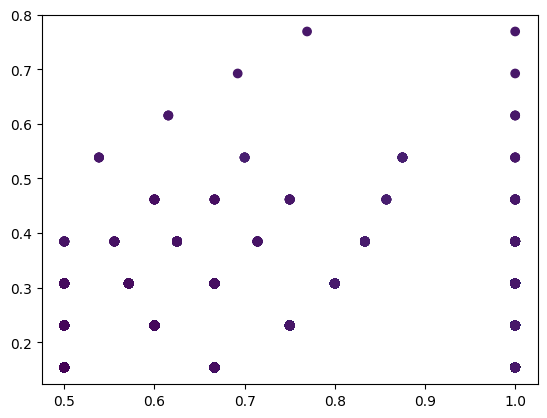

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(strikes_absorbed_médio),(avg_sub_baixo),0.692308,1.000000,0.692308,1.000,1.000000,0.000000,inf,0.000000
10,(striking_acc_médio),(avg_sub_baixo),0.615385,1.000000,0.615385,1.000,1.000000,0.000000,inf,0.000000
39,(reach_alto),(avg_sub_baixo),0.538462,1.000000,0.538462,1.000,1.000000,0.000000,inf,0.000000
387,(wins_alto),(avg_sub_baixo),0.538462,1.000000,0.538462,1.000,1.000000,0.000000,inf,0.000000
62729,(draws_baixo),(avg_sub_baixo),0.769231,1.000000,0.769231,1.000,1.000000,0.000000,inf,0.000000
62731,(losses_alto),(avg_sub_baixo),0.615385,1.000000,0.615385,1.000,1.000000,0.000000,inf,0.000000
62738,"(losses_alto, draws_baixo)",(avg_sub_baixo),0.538462,1.000000,0.538462,1.000,1.000000,0.000000,inf,0.000000
62789,(strikes_landed_médio),(avg_sub_baixo),0.615385,1.000000,0.615385,1.000,1.000000,0.000000,inf,0.000000
62800,"(strikes_landed_médio, striking_acc_médio)",(avg_sub_baixo),0.538462,1.000000,0.538462,1.000,1.000000,0.000000,inf,0.000000
62806,"(draws_baixo, strikes_landed_médio)",(avg_sub_baixo),0.538462,1.000000,0.538462,1.000,1.000000,0.000000,inf,0.000000


In [89]:
#peso pesado
df_peso_pesado = df_peso_pesado.drop(columns="weight_class_2")
df_lista_pesado = df_peso_pesado.astype(str).values.tolist()
te3 = TransactionEncoder()
te_ary = te3.fit(df_lista_pesado).transform(df_lista_pesado)
df_transformado = pd.DataFrame(te_ary, columns = te3.columns_)
frequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
regras = regras.sort_values(['confidence', 'lift'], ascending =[False, False])
plt.scatter(regras['confidence'], regras['support'], c=regras['lift'])
plt.show()
regras
rules_above = regras[(regras["confidence"] > 0.80) & (regras["support"] > 0.5)]
rules_above.to_csv("dataframe_regras_pesado.csv", index = False)

rules_above

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


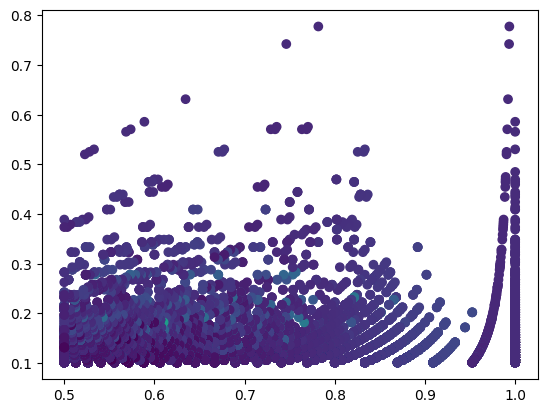

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5634,(reach_alto),(avg_sub_baixo),0.565657,0.994949,0.565657,1.000000,1.005076,0.002857,inf,0.011628
7740,(takedowns_landed_médio),(avg_sub_baixo),0.585859,0.994949,0.585859,1.000000,1.005076,0.002959,inf,0.012195
7824,(strike_defence_médio),(avg_sub_baixo),0.530303,0.994949,0.530303,1.000000,1.005076,0.002678,inf,0.010753
1,(striking_acc_médio),(avg_sub_baixo),0.782828,0.994949,0.777778,0.993548,0.998592,-0.001097,0.782828,-0.006452
5,(draws_baixo),(avg_sub_baixo),0.747475,0.994949,0.742424,0.993243,0.998285,-0.001275,0.747475,-0.006757
17,(idh_alto),(avg_sub_baixo),0.636364,0.994949,0.631313,0.992063,0.997099,-0.001837,0.636364,-0.007937
8,"(draws_baixo, striking_acc_médio)",(avg_sub_baixo),0.575758,0.994949,0.570707,0.991228,0.996260,-0.002143,0.575758,-0.008772
20,"(idh_alto, striking_acc_médio)",(avg_sub_baixo),0.530303,0.994949,0.525253,0.990476,0.995504,-0.002372,0.530303,-0.009524
52,(strikes_landed_médio),(avg_sub_baixo),0.525253,0.994949,0.520202,0.990385,0.995412,-0.002398,0.525253,-0.009615
13,(idh_alto),(striking_acc_médio),0.636364,0.782828,0.530303,0.833333,1.064516,0.032140,1.303030,0.166667


In [90]:
#df_total
df_disc = df_disc.drop(columns="weight_class_2")
df_lista_total = df_disc.astype(str).values.tolist()
te3 = TransactionEncoder()
te_ary = te3.fit(df_lista_total).transform(df_lista_total)
df_transformado = pd.DataFrame(te_ary, columns = te3.columns_)
frequent_itemsets = fpgrowth(df_transformado, min_support=0.1, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
regras = regras.sort_values(['confidence', 'lift'], ascending =[False, False])
plt.scatter(regras['confidence'], regras['support'], c=regras['lift'])
plt.show()
regras
rules_above = regras[(regras["confidence"] > 0.80) & (regras["support"] > 0.5)]
rules_above.to_csv("dataframe_regras_total.csv", index = False)

rules_above